In [215]:
## IMport libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import percentile
from pandas import read_excel
import warnings
warnings.filterwarnings('ignore')
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})
from scipy.stats import norm
import statistics

In [ ]:
"""Tha variables to taken in for EDA.
PGR:CY1001:DIC4003-OP
PGR:CY1001:DIC4003-PV
PGR:CY1001:DIC4003-SP
FGO:FGOMASSPULL:WIC5401-OP
FGO:FGOMASSPULL:WIC5401-PV
FGO:FGOMASSPULL:WIC5401-SP
FGO:SN1002:AIC4010-OP
FGO:SN1002:AIC4010-PV
FGO:SN1002:AIC4010-SP
PGR:CY2001:DIC6053-OP
PGR:CY2001:DIC6053-PV
PGR:CY2001:DIC6053-SP
PGR:CY001:DIC030C-OP
PGR:CY001:DIC030C-PV
PGR:CY001:DIC030C-SP

In Data collection phase, we have marked down the attributes nad their location, 
and details like units and description."""

In [2]:
## importing the files 

df1 = read_csv('Airflow_level_masspull.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df2 = read_csv('Chemical_add_variables.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df3 = read_csv('Cyclone_feed_size.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df4 = read_csv('HGO_cyclone_feed_size.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#print(df.head())

In [3]:
## Making copy of dataframe
df_m=df1.copy()
df_n=df2.copy()
df_o=df3.copy()
df_p=df4.copy()

In [4]:
df_m.shape

(524161, 44)

In [5]:
df_n.shape

(524161, 53)

In [6]:
df_o.shape

(524161, 27)

In [7]:
df_p.shape

(524161, 36)

# FGO Analysis

In [9]:
"""We will be considering the below mentioned attributes for FGO Univariate Analysis.
PGR:CY1001:DIC4003-OP
PGR:CY1001:DIC4003-PV
PGR:CY1001:DIC4003-SP
FGO:FGOMASSPULL:WIC5401-OP
FGO:FGOMASSPULL:WIC5401-PV
FGO:FGOMASSPULL:WIC5401-SP
FGO:SN1002:AIC4010-OP
FGO:SN1002:AIC4010-PV
FGO:SN1002:AIC4010-SP
"""

'We will be considering the below mentioned attributes for FGO Univariate Analysis.\nPGR:CY1001:DIC4003-OP\nPGR:CY1001:DIC4003-PV\nPGR:CY1001:DIC4003-SP\nFGO:FGOMASSPULL:WIC5401-OP\nFGO:FGOMASSPULL:WIC5401-PV\nFGO:FGOMASSPULL:WIC5401-SP\nFGO:SN1002:AIC4010-OP\nFGO:SN1002:AIC4010-PV\nFGO:SN1002:AIC4010-SP\n'

In [10]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [11]:
NumericDtype(df_m)
NumericDtype(df_n)
NumericDtype(df_o)

In [ ]:
#Considering FGO Cyclone Overflow Density Control

In [14]:
## calculating summary ##
def summary5point(dataframe):
    perc=[0.25,0.50,0.75]
    include=['object', 'float', 'int']
    desc = dataframe.describe(percentiles = perc, include = include)
    #dataframe=str(dataframe)
    desc.to_csv('dataframe'+'.csv')
    return;

In [22]:
summary5point(df_o['PGR:CY1001:DIC4003-OP'])
summary5point(df_o['PGR:CY1001:DIC4003-PV'])
summary5point(df_o['PGR:CY1001:DIC4003-SP'])

In [18]:
def central_measures(df,var):
    return(df[var].describe())

In [31]:
Sum1=central_measures(df_o,'PGR:CY1001:DIC4003-OP').to_dict()

In [32]:
Sum2=central_measures(df_o,'PGR:CY1001:DIC4003-PV').to_dict()

In [33]:
Sum3=central_measures(df_o,'PGR:CY1001:DIC4003-SP').to_dict()

In [50]:
S1=pd.DataFrame.from_dict(Sum1,orient='index',columns=['FGO Cyclone Overflow Density Control OP'])
S2=pd.DataFrame.from_dict(Sum1,orient='index',columns=['[OV] FGO Cyclone Overflow Density Control PV'])
S3=pd.DataFrame.from_dict(Sum1,orient='index',columns=['FGO Cyclone Overflow Density Control SP'])

In [67]:
bigdata = pd.concat([S1, S2,S3], ignore_index=False,sort =False,axis=1)

In [68]:
bigdata

,FGO Cyclone Overflow Density Control OP,[OV] FGO Cyclone Overflow Density Control PV,FGO Cyclone Overflow Density Control SP
mean,660.743718,660.743718,660.743718
std,97.901024,97.901024,97.901024
min,0.000000,0.000000,0.000000
25%,627.976074,627.976074,627.976074
50%,678.668610,678.668610,678.668610
75%,729.895798,729.895798,729.895798
max,880.000000,880.000000,880.000000


In [72]:
descriptive_stats=bigdata.swapaxes("index", "columns") 

In [73]:
descriptive_stats

,mean,std,min,25%,50%,75%,max
FGO Cyclone Overflow Density Control OP,660.743718,97.901024,0.0,627.976074,678.66861,729.895798,880.0
[OV] FGO Cyclone Overflow Density Control PV,660.743718,97.901024,0.0,627.976074,678.66861,729.895798,880.0
FGO Cyclone Overflow Density Control SP,660.743718,97.901024,0.0,627.976074,678.66861,729.895798,880.0


# FGO Cyclone Overflow Density Control OP

In [87]:
df_o['PGR:CY1001:DIC4003-OP'].skew()

-1.727189528913806

In [89]:
df_o['PGR:CY1001:DIC4003-OP'].kurtosis()

5.203623336670923

In [93]:
df_o['PGR:CY1001:DIC4003-OP'].std()

97.9010243944682

In [101]:
df_o['PGR:CY1001:DIC4003-OP'].var()

9584.610577486255

In [193]:
df_o['PGR:CY1001:DIC4003-OP'].isnull().sum()

831

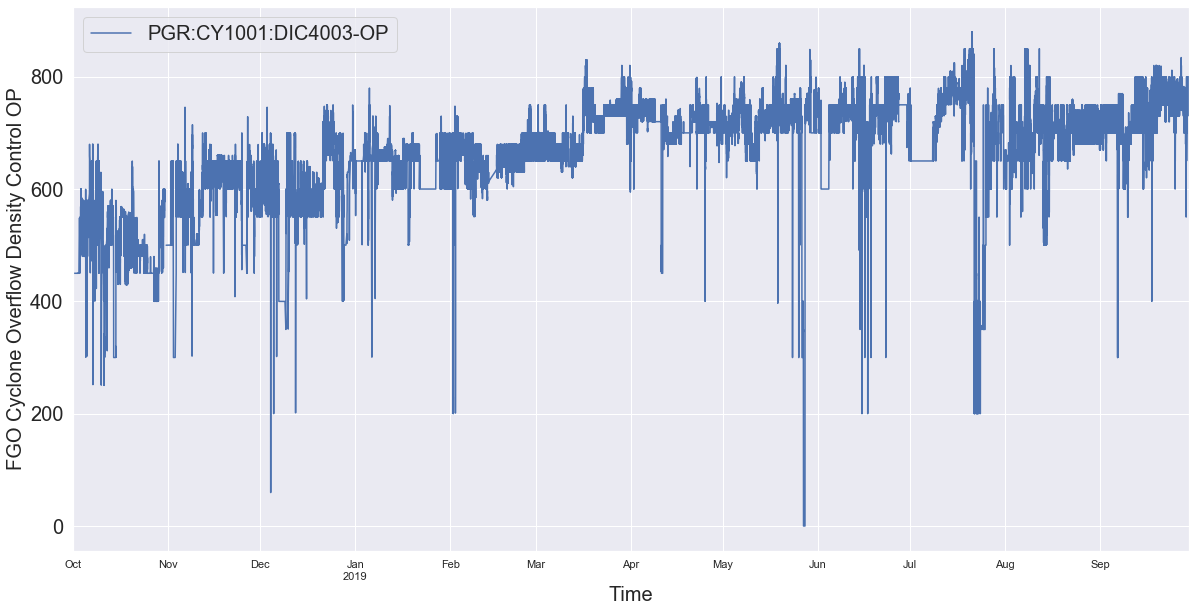

In [219]:
fig_n=plt.figure()
ax = df_o['PGR:CY1001:DIC4003-OP'].plot()
ax.set(xlabel='Time', ylabel='FGO Cyclone Overflow Density Control OP')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
plt.show()

No handles with labels found to put in legend.


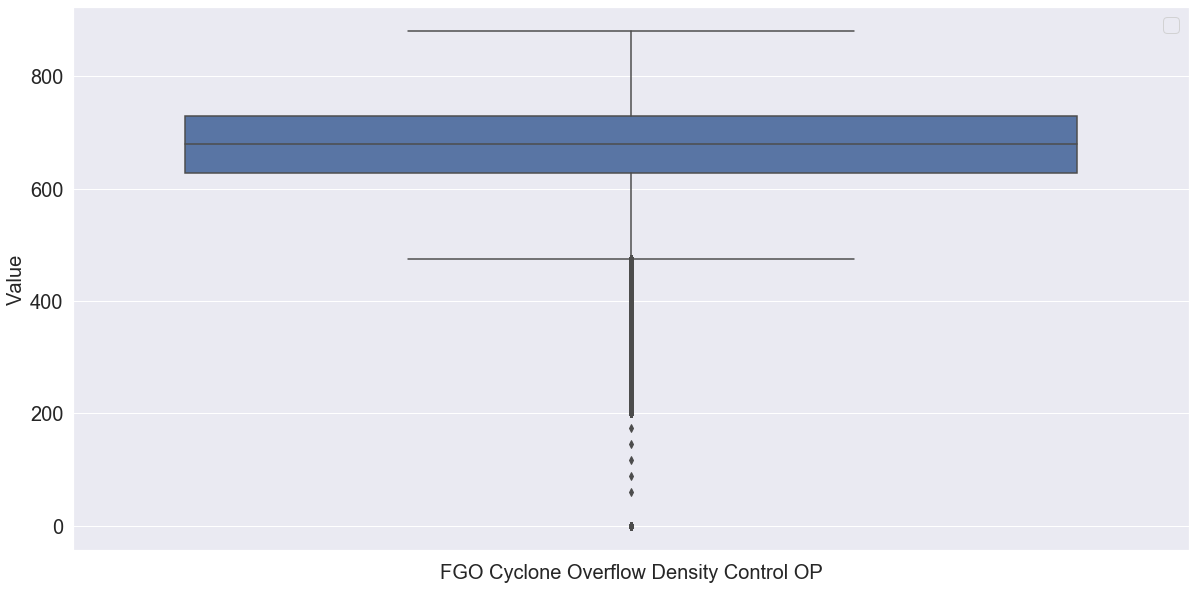

In [192]:
pp = PdfPages('FGO Cyclone Overflow Density Control OP_Box_1_plots.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_o['PGR:CY1001:DIC4003-OP'],data=df_o)
ax.set(xlabel='FGO Cyclone Overflow Density Control OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

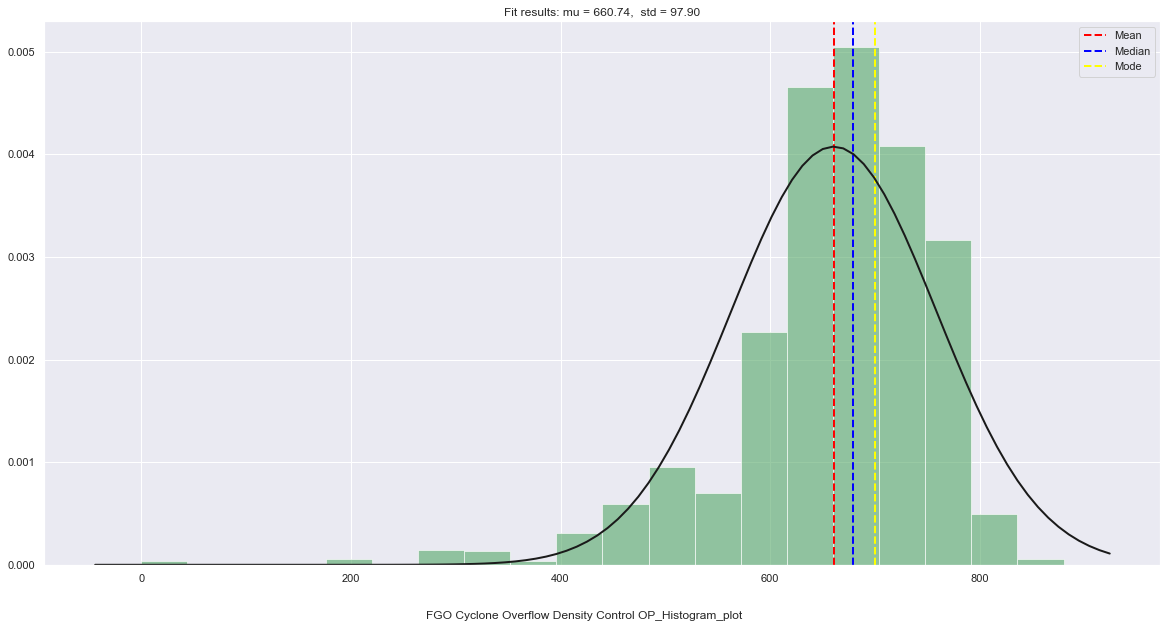

In [135]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_o['PGR:CY1001:DIC4003-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Cyclone Overflow Density Control OP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Cyclone Overflow Density Control OP_Histogram_plot"
plt.hist(df_o['PGR:CY1001:DIC4003-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_o['PGR:CY1001:DIC4003-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_o['PGR:CY1001:DIC4003-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_o['PGR:CY1001:DIC4003-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# [OV] FGO Cyclone Overflow Density Control PV

In [136]:
df_o['PGR:CY1001:DIC4003-PV'].skew()

-1.16493931596957

In [137]:
df_o['PGR:CY1001:DIC4003-PV'].kurtosis()

2.479274861573191

In [138]:
df_o['PGR:CY1001:DIC4003-PV'].std()

14.302764408856875

In [139]:
df_o['PGR:CY1001:DIC4003-PV'].var()

204.56906973526299

In [194]:
df_o['PGR:CY1001:DIC4003-PV'].isnull().sum()

5032

No handles with labels found to put in legend.


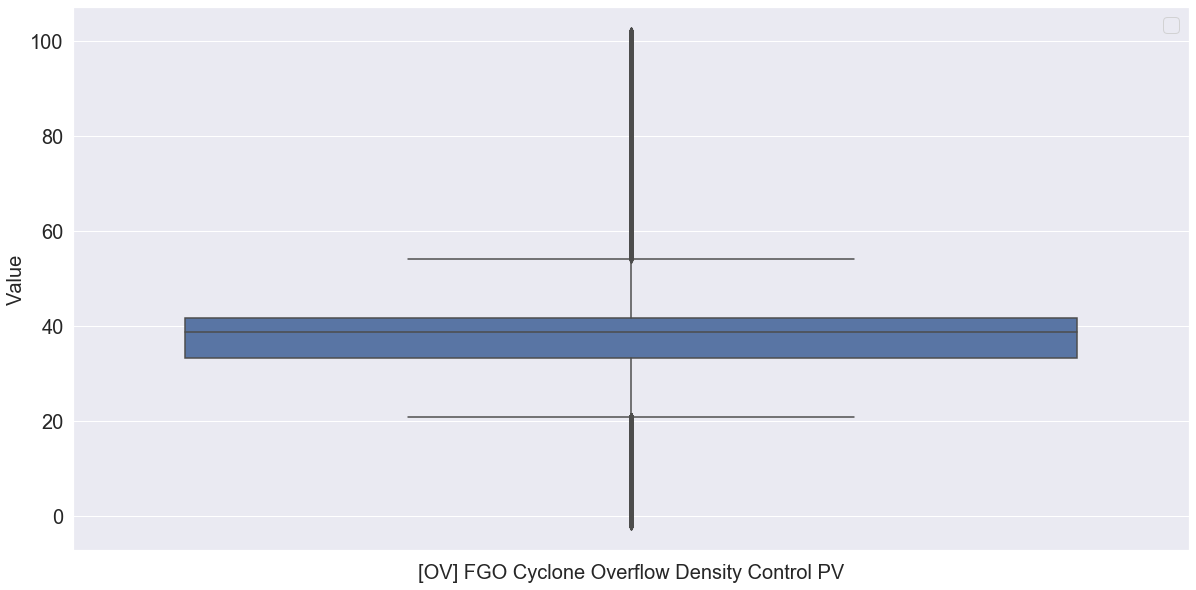

In [141]:
pp = PdfPages('[OV] FGO Cyclone Overflow Density Control PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_o['PGR:CY1001:DIC4003-PV'],data=df_o)
ax.set(xlabel='[OV] FGO Cyclone Overflow Density Control PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

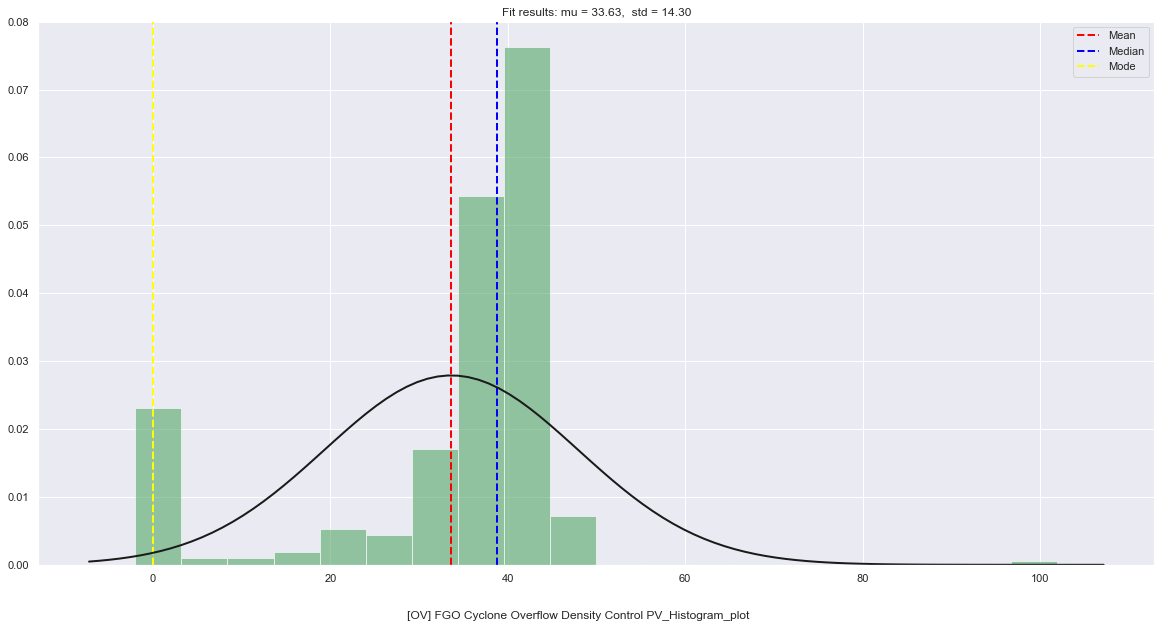

In [142]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_o['PGR:CY1001:DIC4003-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('[OV] FGO Cyclone Overflow Density Control PV_Histogram_plot.pdf')
fig=plt.figure()
txt="[OV] FGO Cyclone Overflow Density Control PV_Histogram_plot"
plt.hist(df_o['PGR:CY1001:DIC4003-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_o['PGR:CY1001:DIC4003-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_o['PGR:CY1001:DIC4003-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_o['PGR:CY1001:DIC4003-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Cyclone Overflow Density Control SP


In [143]:
df_o['PGR:CY1001:DIC4003-SP'].skew()

0.04610383048965016

In [144]:
df_o['PGR:CY1001:DIC4003-SP'].kurtosis()

-0.6185046626359969

In [145]:
df_o['PGR:CY1001:DIC4003-SP'].std()

4.965766153038124

In [146]:
df_o['PGR:CY1001:DIC4003-SP'].var()

24.658833486659045

In [195]:
df_o['PGR:CY1001:DIC4003-SP'].isnull().sum()

832

No handles with labels found to put in legend.


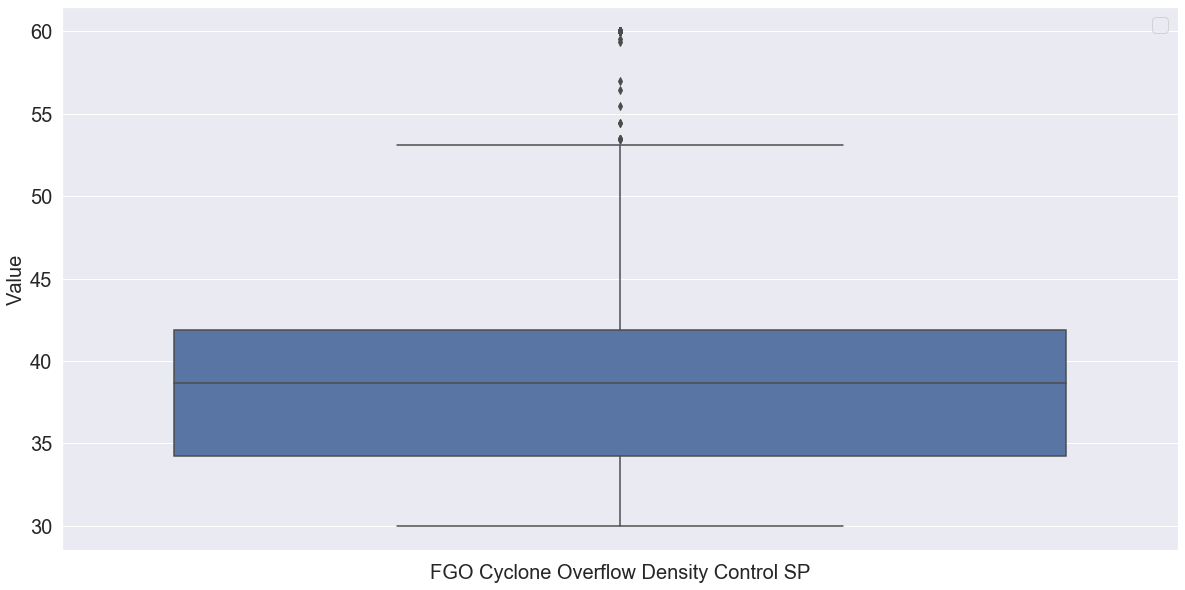

In [147]:
pp = PdfPages('FGO Cyclone Overflow Density Control SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_o['PGR:CY1001:DIC4003-SP'],data=df_o)
ax.set(xlabel='FGO Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

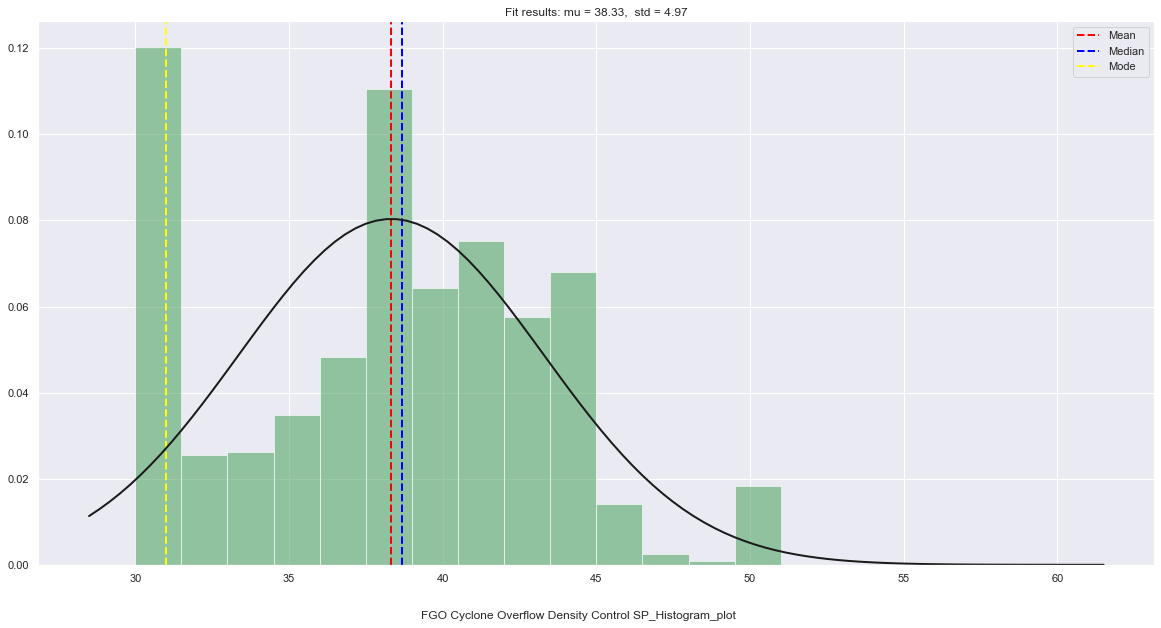

In [151]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_o['PGR:CY1001:DIC4003-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_o['PGR:CY1001:DIC4003-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_o['PGR:CY1001:DIC4003-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_o['PGR:CY1001:DIC4003-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_o['PGR:CY1001:DIC4003-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Mass Pull OP


In [153]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].skew()

1.2059160272831109

In [154]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].kurtosis()

3.5723183000356706

In [155]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].std()

33.54506696843189

In [156]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].var()

1125.27151791658

In [213]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].describe()

count    523939.000000
mean         48.268852
std           7.462345
min          30.000000
25%          45.000000
50%          50.000000
75%          55.000000
max          65.000000
Name: FGO:FGOMASSPULL:WIC5401-SP, dtype: float64

No handles with labels found to put in legend.


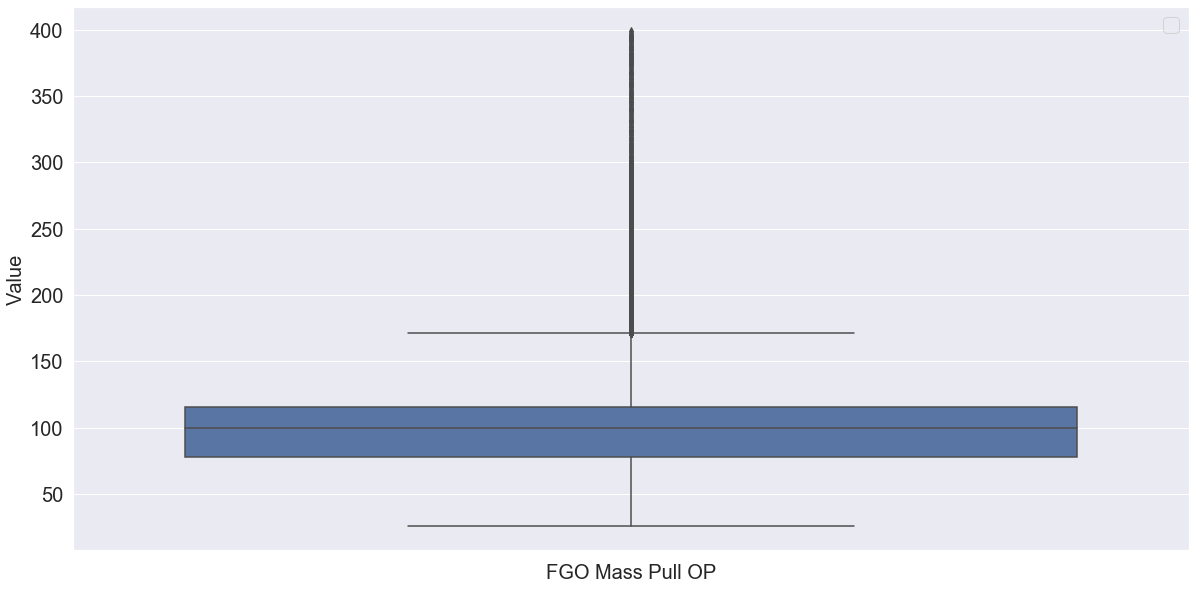

In [157]:
pp = PdfPages('FGO Mass Pull OP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_m['FGO:FGOMASSPULL:WIC5401-OP'],data=df_o)
ax.set(xlabel='FGO Mass Pull OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

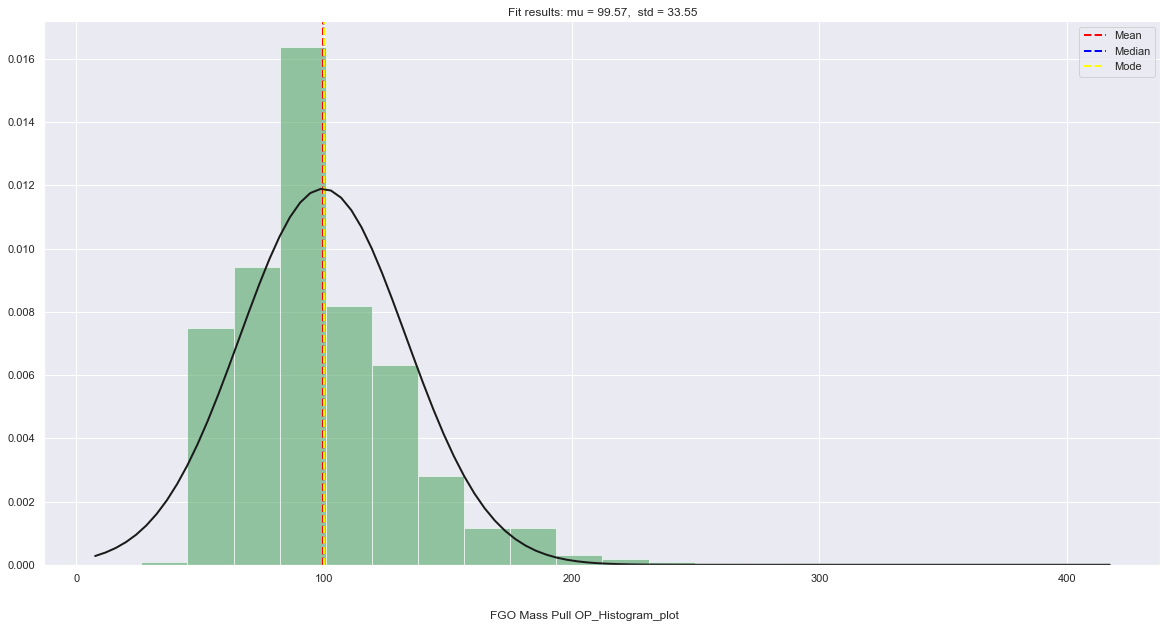

In [158]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_m['FGO:FGOMASSPULL:WIC5401-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Mass Pull OP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Mass Pull OP_Histogram_plot"
plt.hist(df_m['FGO:FGOMASSPULL:WIC5401-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_m['FGO:FGOMASSPULL:WIC5401-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Mass Pull % PV


In [159]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].skew()

-0.6471618998078436

In [160]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].kurtosis()

-0.9661320508103342

In [162]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].std()

21.91109709538331

In [163]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].var()

480.09617592331506

In [199]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].isnull().sum()

222

No handles with labels found to put in legend.


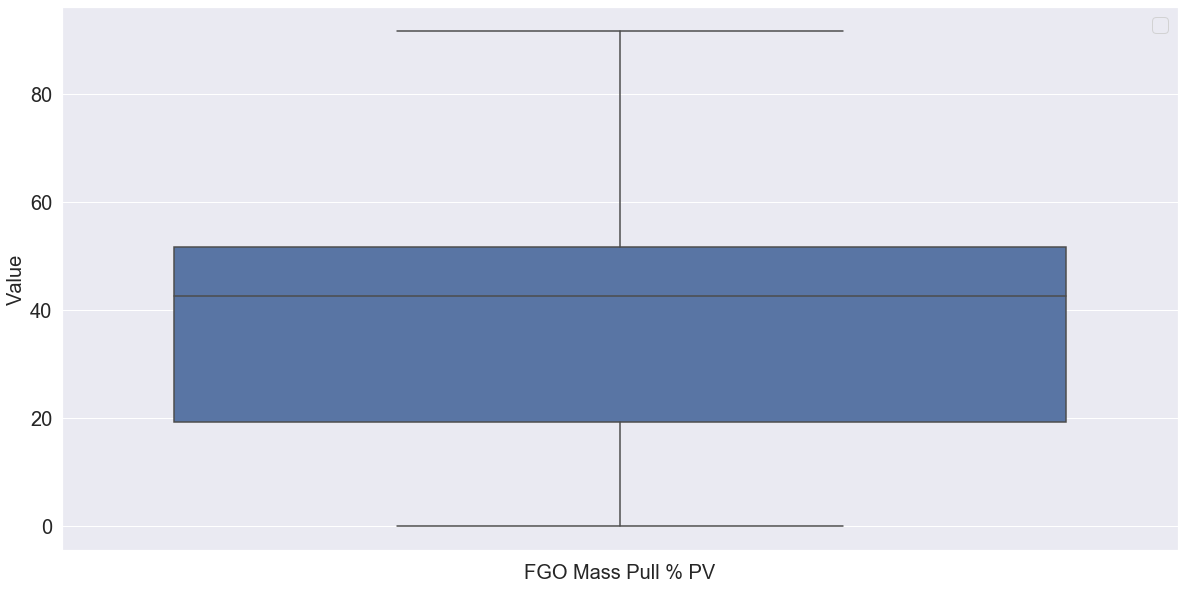

In [164]:
pp = PdfPages('FGO Mass Pull % PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_m['FGO:FGOMASSPULL:WIC5401-PV'],data=df_o)
ax.set(xlabel='FGO Mass Pull % PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

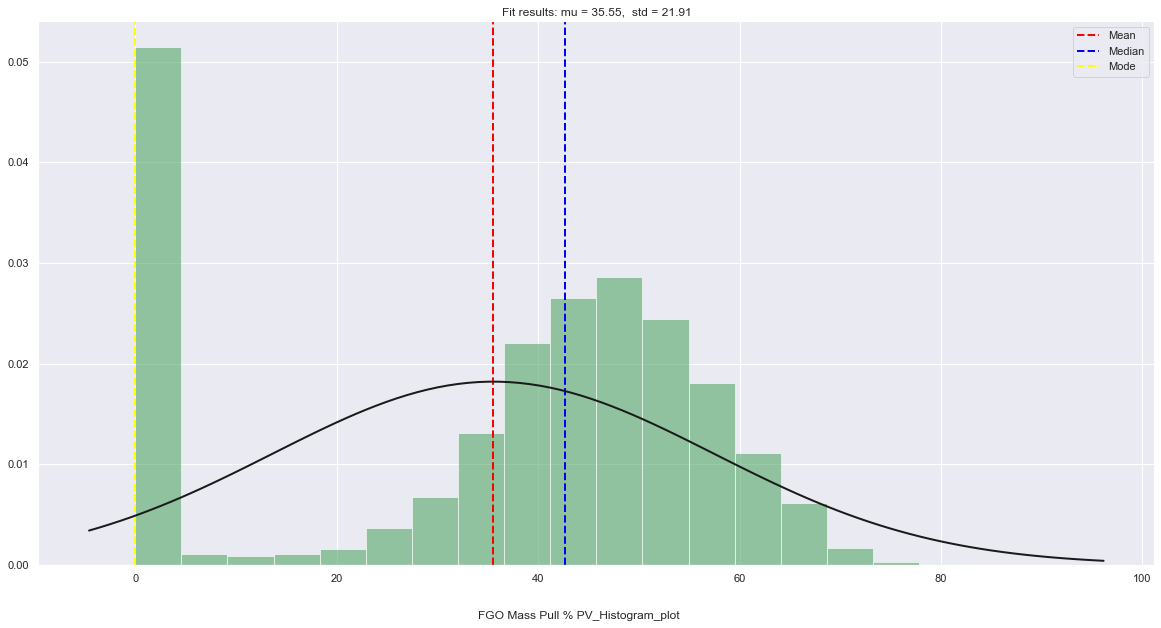

In [165]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_m['FGO:FGOMASSPULL:WIC5401-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Mass Pull % PV_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Mass Pull % PV_Histogram_plot"
plt.hist(df_m['FGO:FGOMASSPULL:WIC5401-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_m['FGO:FGOMASSPULL:WIC5401-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Mass Pull % SP


In [166]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].skew()

0.04987962261182473

In [167]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].kurtosis()

-0.5679134513099693

In [168]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].std()

7.462345392419048

In [169]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].var()

55.6865987557578

In [201]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].isnull().sum()

222

No handles with labels found to put in legend.


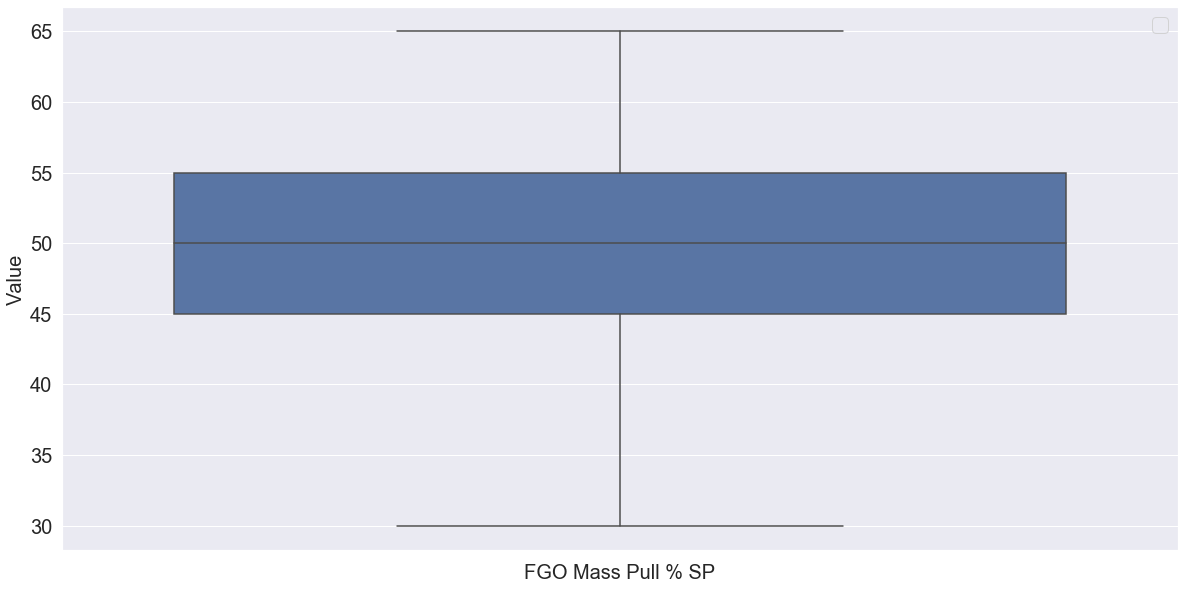

In [170]:
pp = PdfPages('FGO Mass Pull % SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_m['FGO:FGOMASSPULL:WIC5401-SP'],data=df_o)
ax.set(xlabel='FGO Mass Pull % SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

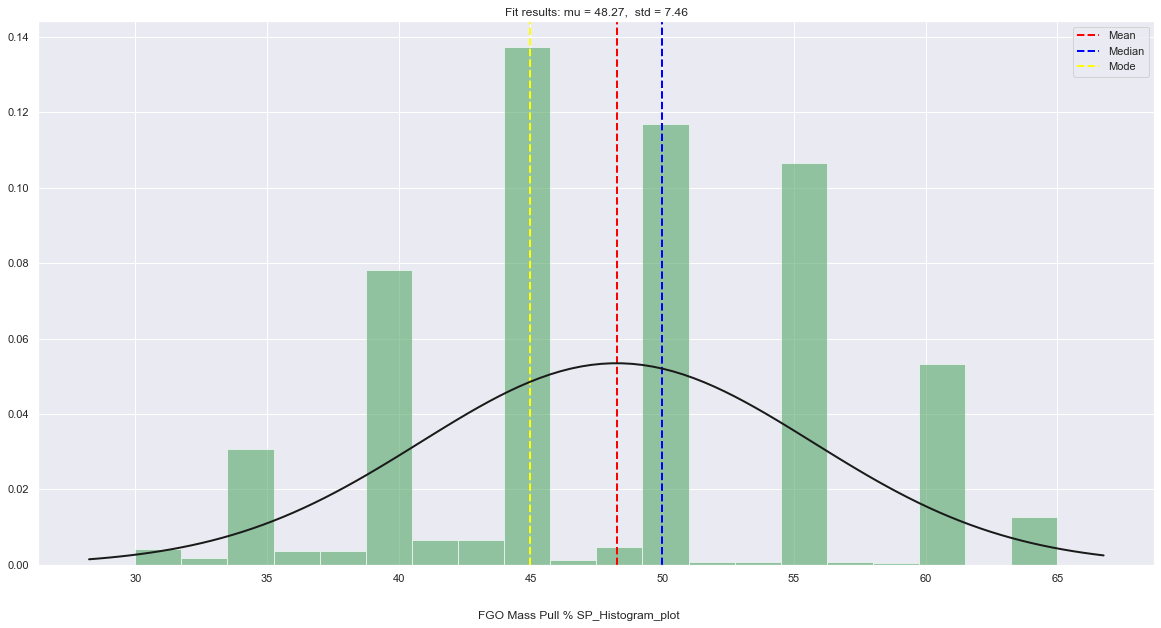

In [171]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_m['FGO:FGOMASSPULL:WIC5401-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Mass Pull % SP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Mass Pull % SP_Histogram_plot"
plt.hist(df_m['FGO:FGOMASSPULL:WIC5401-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_m['FGO:FGOMASSPULL:WIC5401-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# pH Indication for FGO - Manipulated Output


In [173]:
df_n['FGO:SN1002:AIC4010-OP'].skew()

0.06885635815138877

In [174]:
df_n['FGO:SN1002:AIC4010-OP'].std()

0.0006862472215216133

In [175]:
df_n['FGO:SN1002:AIC4010-OP'].kurtosis()

-1.995235262797549

In [176]:
df_n['FGO:SN1002:AIC4010-OP'].var()

4.709352490461342e-07

In [202]:
df_n['FGO:SN1002:AIC4010-OP'].isnull().sum()

222

In [203]:
df_n['FGO:SN1002:AIC4010-OP'].describe()

count    523939.000000
mean         -0.000710
std           0.000686
min          -0.001373
25%          -0.001373
50%          -0.001373
75%           0.000000
max           0.000000
Name: FGO:SN1002:AIC4010-OP, dtype: float64

No handles with labels found to put in legend.


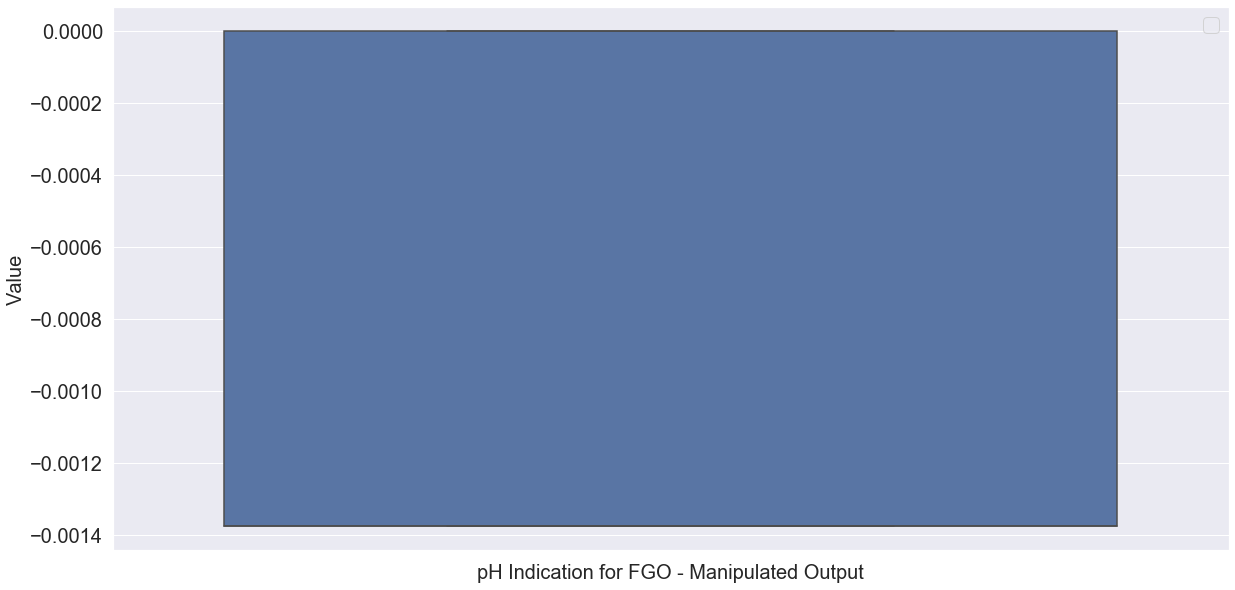

In [177]:
pp = PdfPages('pH Indication for FGO - Manipulated Output_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_n['FGO:SN1002:AIC4010-OP'],data=df_o)
ax.set(xlabel='pH Indication for FGO - Manipulated Output', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

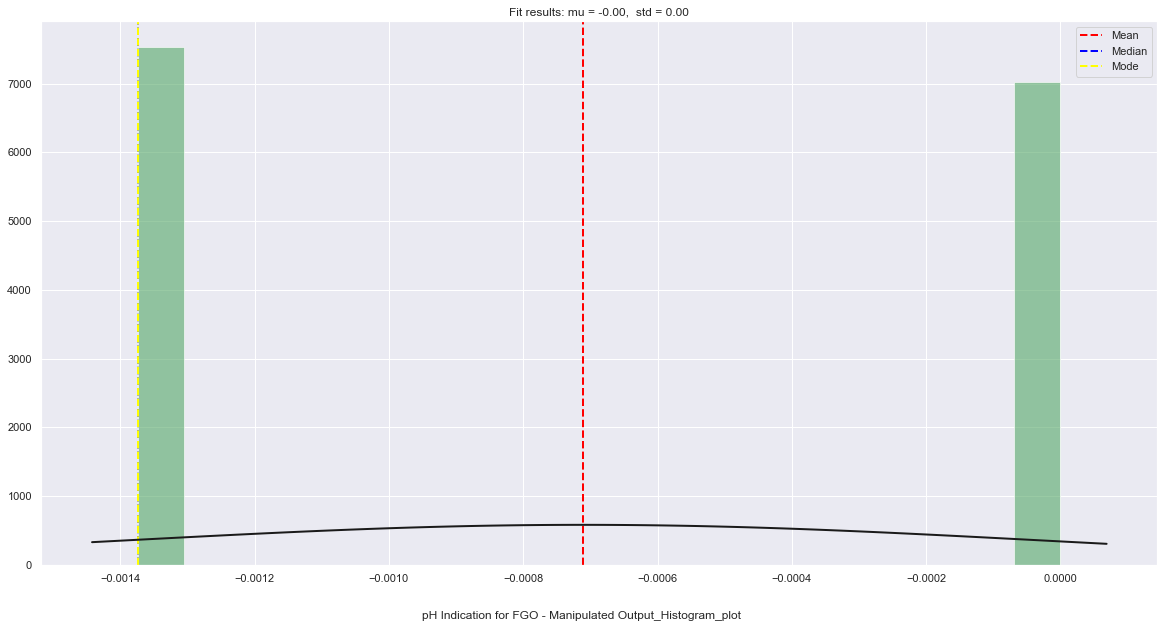

In [184]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_n['FGO:SN1002:AIC4010-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('pH Indication for FGO - Manipulated Output_Histogram_plot.pdf')
fig=plt.figure()
txt="pH Indication for FGO - Manipulated Output_Histogram_plot"
plt.hist(df_n['FGO:SN1002:AIC4010-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_n['FGO:SN1002:AIC4010-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_n['FGO:SN1002:AIC4010-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_n['FGO:SN1002:AIC4010-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# pH Indication for FGO - Process Variable


In [179]:
df_n['FGO:SN1002:AIC4010-PV'].skew()

-0.4029064616434108

In [180]:
df_n['FGO:SN1002:AIC4010-PV'].kurtosis()

0.49053760894456166

In [181]:
df_n['FGO:SN1002:AIC4010-PV'].var()

0.6778337273110148

In [208]:
df_n['FGO:SN1002:AIC4010-PV'].isnull().sum()

222

In [204]:
df_n['FGO:SN1002:AIC4010-PV'].describe()

count    523939.000000
mean          6.380324
std           0.823307
min           0.015312
25%           5.919922
50%           6.439453
75%           6.933271
max          10.867718
Name: FGO:SN1002:AIC4010-PV, dtype: float64

In [205]:
df_n['FGO:SN1002:AIC4010-PV'].isnull().sum()

222

No handles with labels found to put in legend.


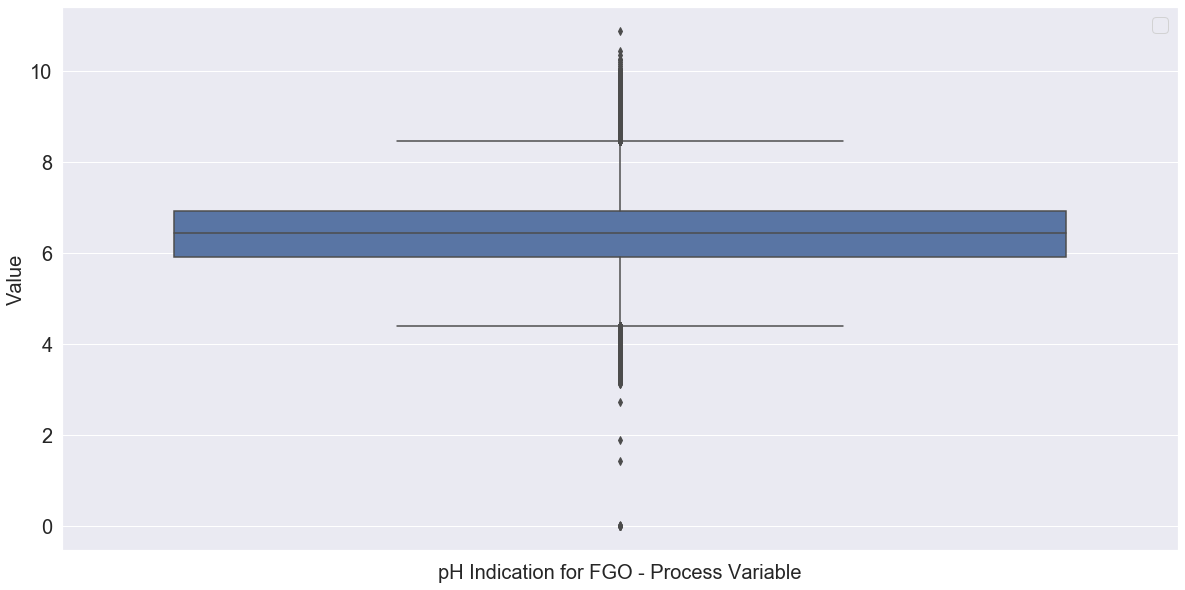

In [183]:
pp = PdfPages('pH Indication for FGO - Process Variable_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_n['FGO:SN1002:AIC4010-PV'],data=df_o)
ax.set(xlabel='pH Indication for FGO - Process Variable', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

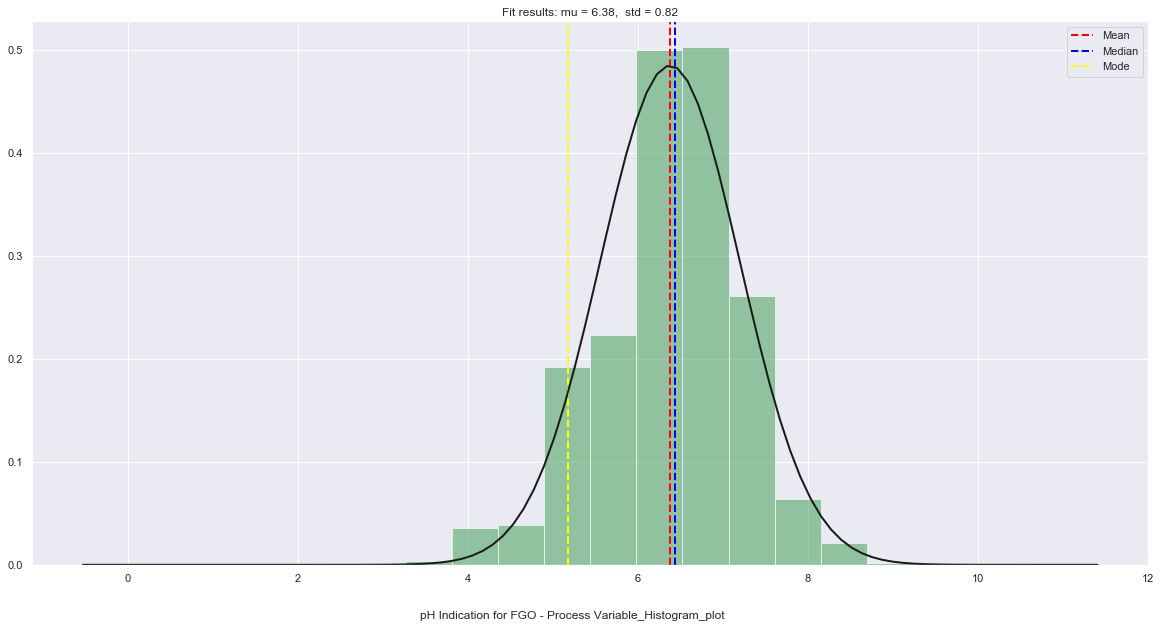

In [185]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_n['FGO:SN1002:AIC4010-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('pH Indication for FGO - Process Variable_Histogram_plot.pdf')
fig=plt.figure()
txt="pH Indication for FGO - Process Variable_Histogram_plot"
plt.hist(df_n['FGO:SN1002:AIC4010-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_n['FGO:SN1002:AIC4010-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_n['FGO:SN1002:AIC4010-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_n['FGO:SN1002:AIC4010-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# pH Indication for FGO - SetPoint


In [186]:
df_n['FGO:SN1002:AIC4010-SP'].skew()

-45.86310614321613

In [187]:
df_n['FGO:SN1002:AIC4010-SP'].kurtosis()

2242.367201814103

In [188]:
df_n['FGO:SN1002:AIC4010-SP'].std()

0.016336019079156334

In [189]:
df_n['FGO:SN1002:AIC4010-SP'].var()

0.0002668655193545598

In [210]:
df_n['FGO:SN1002:AIC4010-SP'].isnull().sum()

222

No handles with labels found to put in legend.


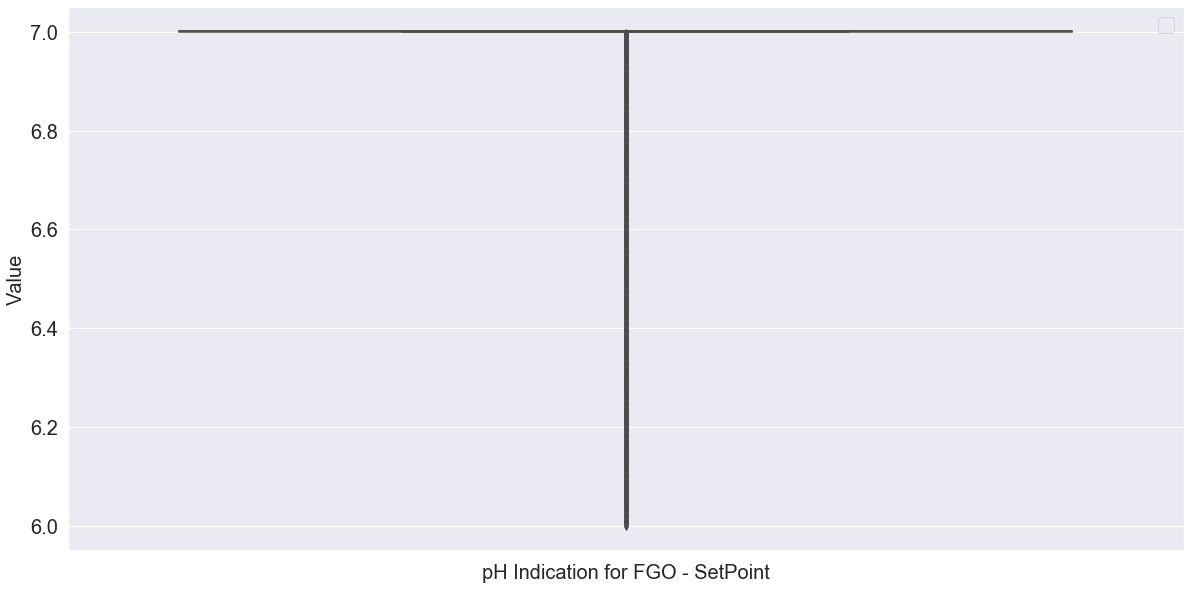

In [190]:
pp = PdfPages('pH Indication for FGO - SetPoint_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_n['FGO:SN1002:AIC4010-SP'],data=df_o)
ax.set(xlabel='pH Indication for FGO - SetPoint', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

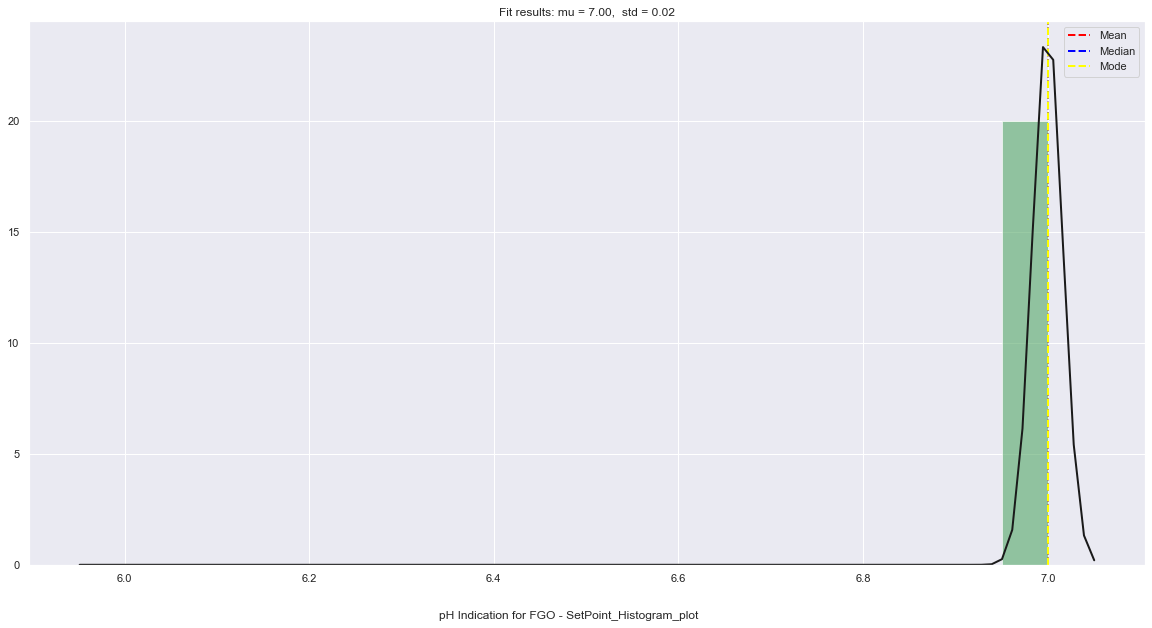

In [191]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_n['FGO:SN1002:AIC4010-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('pH Indication for FGO - SetPoint_Histogram_plot.pdf')
fig=plt.figure()
txt="pH Indication for FGO - SetPoint_Histogram_plot"
plt.hist(df_n['FGO:SN1002:AIC4010-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_n['FGO:SN1002:AIC4010-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_n['FGO:SN1002:AIC4010-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_n['FGO:SN1002:AIC4010-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# HGO Analysis

In [221]:
NumericDtype(df_p)

In [222]:
Sum10=central_measures(df_p,'PGR:CY2001:DIC6053-OP').to_dict()
Sum11=central_measures(df_p,'PGR:CY2001:DIC6053-PV').to_dict()
Sum12=central_measures(df_p,'PGR:CY2001:DIC6053-SP').to_dict()
Sum13=central_measures(df_p,'PGR:CY001:DIC030C-OP').to_dict()
Sum14=central_measures(df_p,'PGR:CY001:DIC030C-PV').to_dict()
Sum15=central_measures(df_p,'PGR:CY001:DIC030C-SP').to_dict()

In [223]:
S6=pd.DataFrame.from_dict(Sum10,orient='index',columns=['HGO 2 Cyclone Overflow Density Control OP'])
S7=pd.DataFrame.from_dict(Sum11,orient='index',columns=['HGO 2 Cyclone Overflow Density Control PV'])
S8=pd.DataFrame.from_dict(Sum12,orient='index',columns=['HGO 2 Cyclone Overflow Density Control SP'])
S9=pd.DataFrame.from_dict(Sum13,orient='index',columns=['HGO1 Cyclone Overflow Density Control OP'])
S10=pd.DataFrame.from_dict(Sum14,orient='index',columns=['HGO1 Cyclone Overflow Density Control PV'])
S11=pd.DataFrame.from_dict(Sum15,orient='index',columns=['HGO1 Cyclone Overflow Density Control SP'])

In [227]:
bigdata1 = pd.concat([S6,S7,S8,S9,S10,S11], ignore_index=False,sort =False,axis=1)

In [229]:
Summary=bigdata1.drop('count')

In [230]:
Summary

,HGO 2 Cyclone Overflow Density Control OP,HGO 2 Cyclone Overflow Density Control PV,HGO 2 Cyclone Overflow Density Control SP,HGO1 Cyclone Overflow Density Control OP,HGO1 Cyclone Overflow Density Control PV,HGO1 Cyclone Overflow Density Control SP
mean,679.274855,32.284377,36.975681,763.562239,36.258053,34.482909
std,146.894727,14.103053,4.272877,136.401923,18.025100,4.439494
min,100.000000,-0.011129,30.000000,104.945816,-1.998107,30.000000
25%,600.000000,32.149757,34.600799,700.000000,34.098101,30.990917
50%,715.048828,36.577919,36.215536,800.319397,37.726345,33.076948
75%,799.218384,39.620694,38.852177,864.569580,40.935389,37.000000
max,1484.475464,101.247681,50.000000,1836.000000,101.982132,50.000000


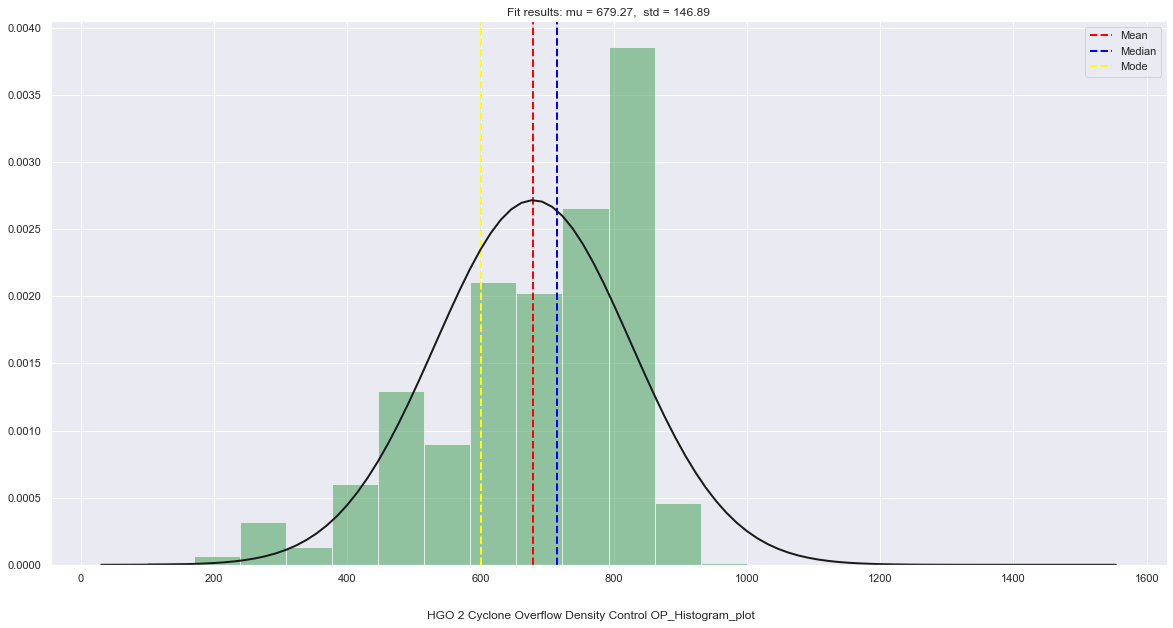

In [231]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control OP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO 2 Cyclone Overflow Density Control OP_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [232]:
df_p['PGR:CY2001:DIC6053-OP'].skew()

-0.886372940290326

In [233]:
df_p['PGR:CY2001:DIC6053-OP'].kurtosis()

0.22354092976025486

In [234]:
df_p['PGR:CY2001:DIC6053-OP'].std()

146.8947271718025

In [235]:
df_p['PGR:CY2001:DIC6053-OP'].var()

21578.06087087829

In [236]:
df_p['PGR:CY2001:DIC6053-OP'].isnull().sum()

1439

No handles with labels found to put in legend.


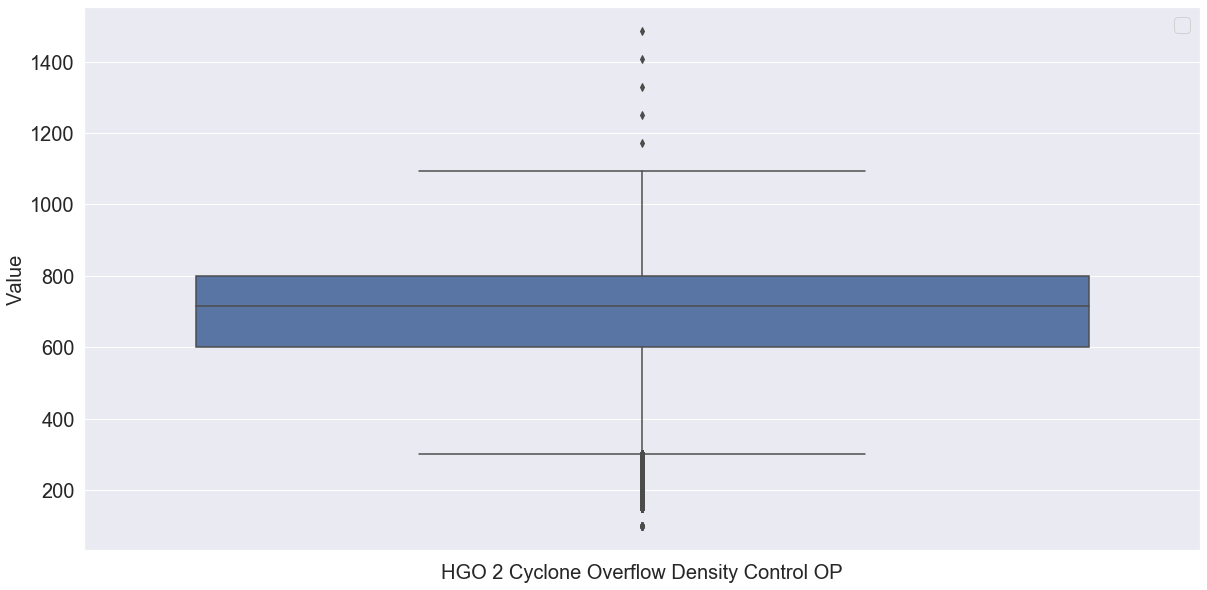

In [237]:
pp = PdfPages('HGO 2 Cyclone Overflow Density Control OP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-OP'],data=df_p)
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

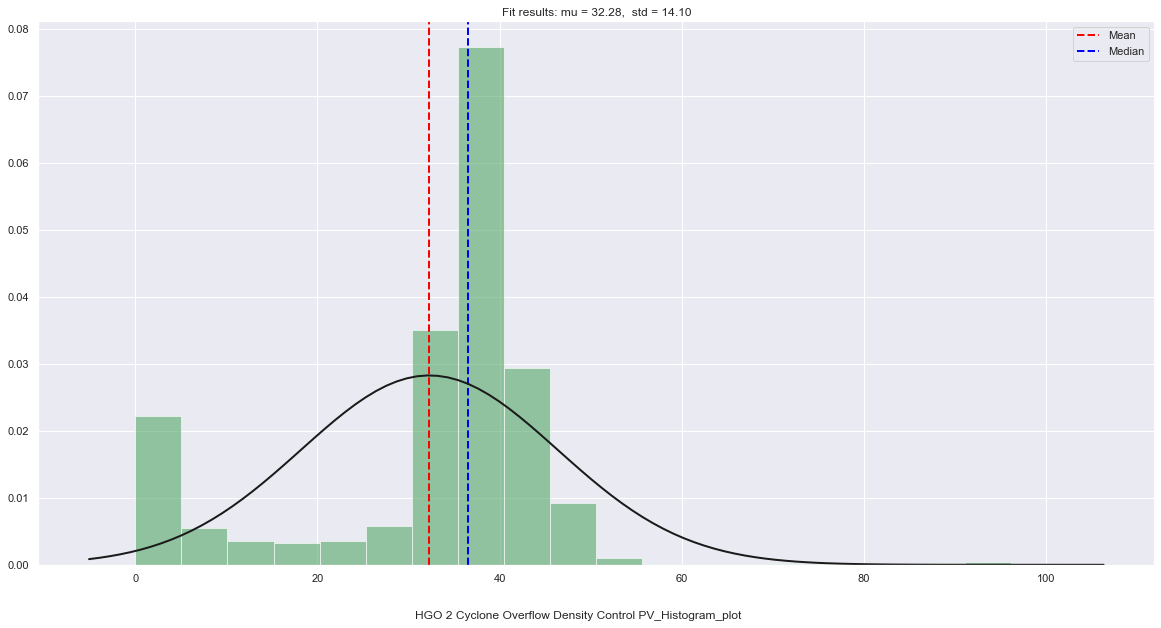

In [240]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control PV_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO 2 Cyclone Overflow Density Control PV_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
#plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [241]:
df_p['PGR:CY2001:DIC6053-PV'].skew()

-0.9085329012871901

In [242]:
df_p['PGR:CY2001:DIC6053-PV'].kurtosis()

1.5721797683927696

In [243]:
df_p['PGR:CY2001:DIC6053-PV'].std()

14.103052786873304

In [244]:
df_p['PGR:CY2001:DIC6053-PV'].var()

198.89609790933486

In [245]:
df_p['PGR:CY2001:DIC6053-PV'].isnull().sum()

3619

No handles with labels found to put in legend.


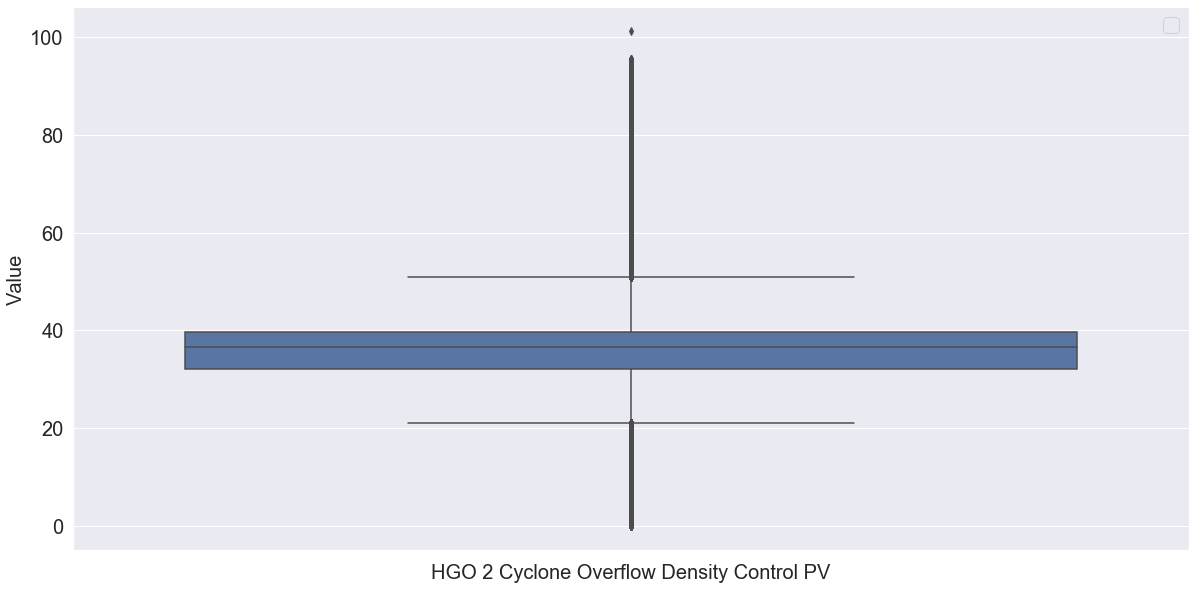

In [246]:
pp = PdfPages('HGO 2 Cyclone Overflow Density Control PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-PV'],data=df_p)
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

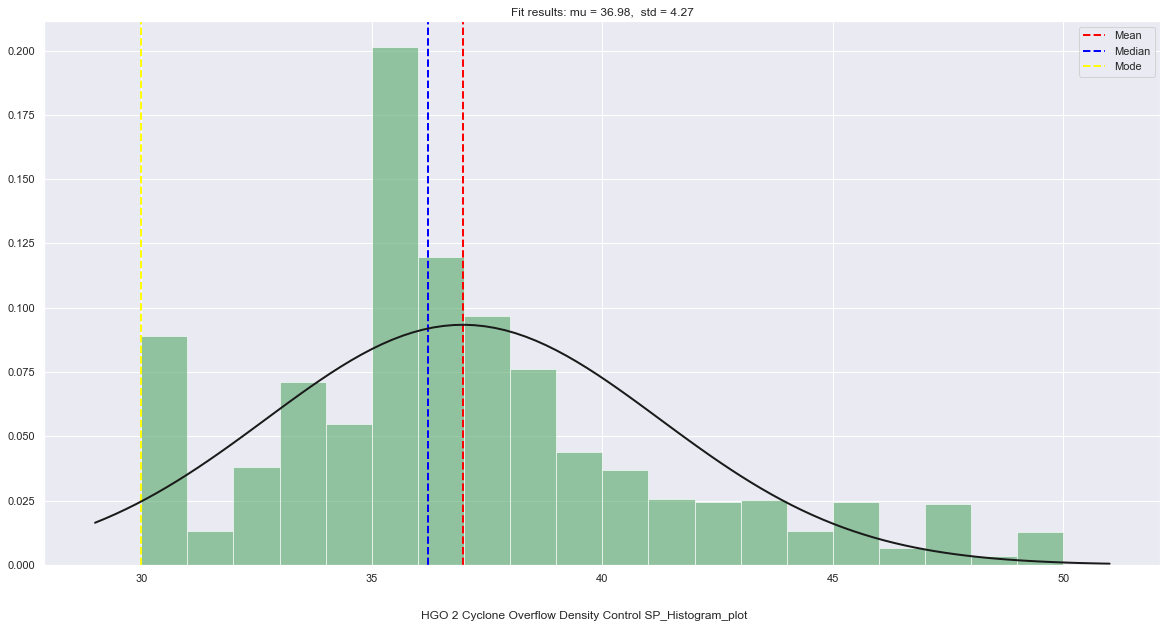

In [249]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO 2 Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [250]:
df_p['PGR:CY2001:DIC6053-SP'].skew()

0.7627253376220143

In [251]:
df_p['PGR:CY2001:DIC6053-SP'].kurtosis()

0.515411923996631

In [252]:
df_p['PGR:CY2001:DIC6053-SP'].std()

4.272876912710988

In [280]:
df_p['PGR:CY2001:DIC6053-SP'].isnull().sum()

1439

No handles with labels found to put in legend.


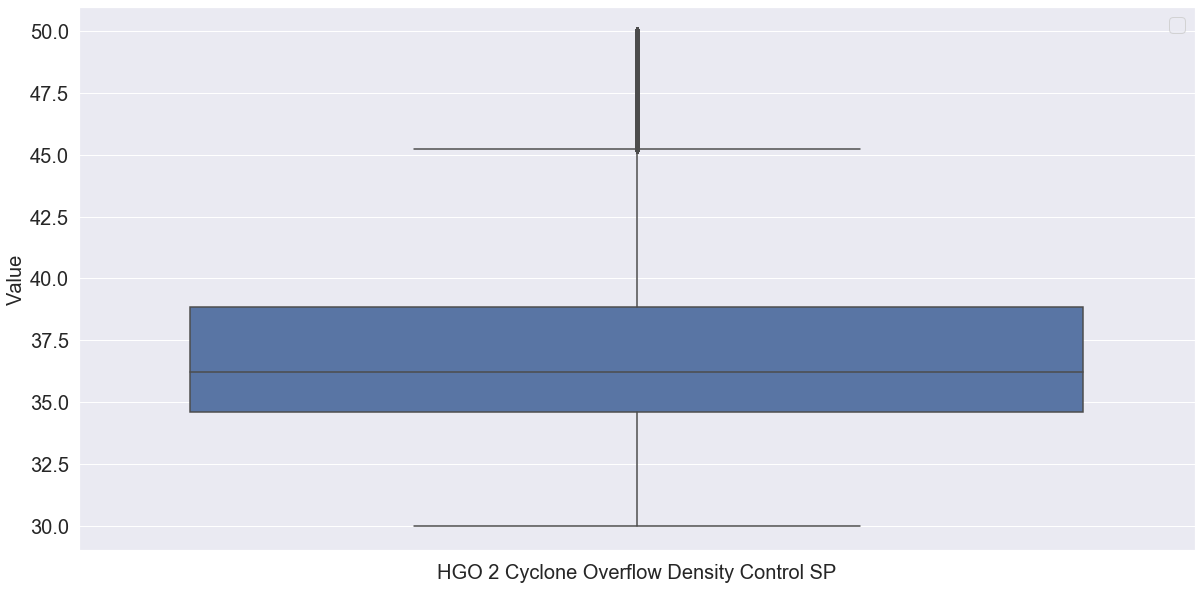

In [255]:
pp = PdfPages('HGO 2 Cyclone Overflow Density Control SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-SP'],data=df_p)
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

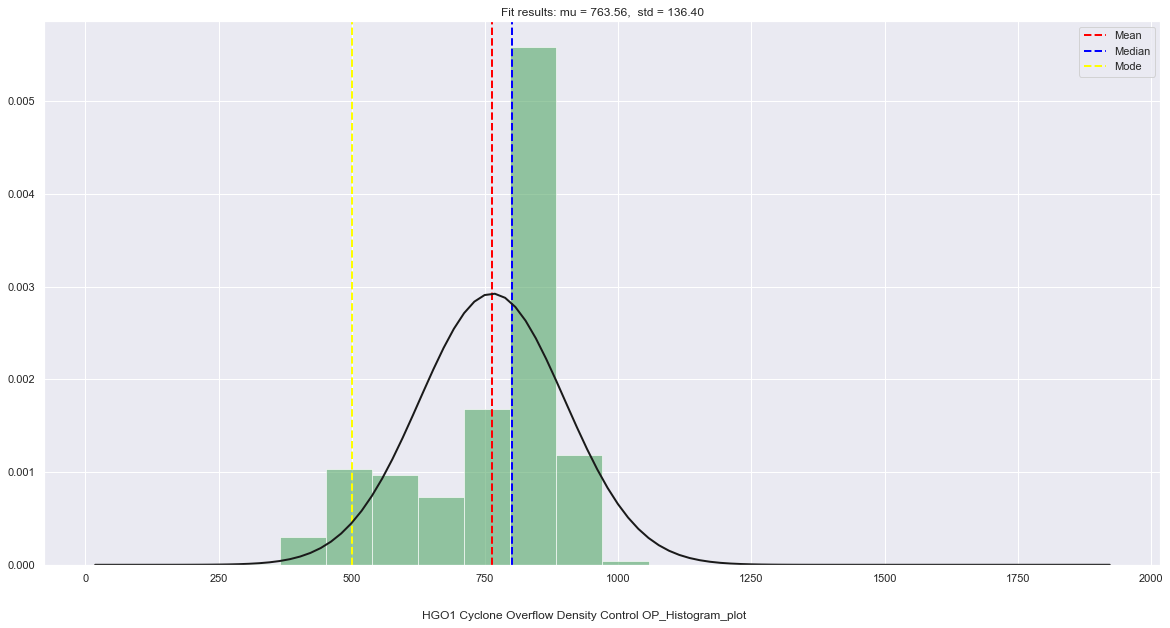

In [256]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY001:DIC030C-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO1 Cyclone Overflow Density Control OP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO1 Cyclone Overflow Density Control OP_Histogram_plot"
plt.hist(df_p['PGR:CY001:DIC030C-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY001:DIC030C-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY001:DIC030C-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY001:DIC030C-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [257]:
df_p['PGR:CY001:DIC030C-OP'].skew()

-1.0704476057398131

In [258]:
df_p['PGR:CY001:DIC030C-OP'].kurtosis()

0.11165753081251228

In [259]:
df_p['PGR:CY001:DIC030C-OP'].std()

136.40192345887723

In [260]:
df_p['PGR:CY001:DIC030C-OP'].var()

18605.484723281403

In [261]:
df_p['PGR:CY001:DIC030C-OP'].isnull().sum()

1816

No handles with labels found to put in legend.


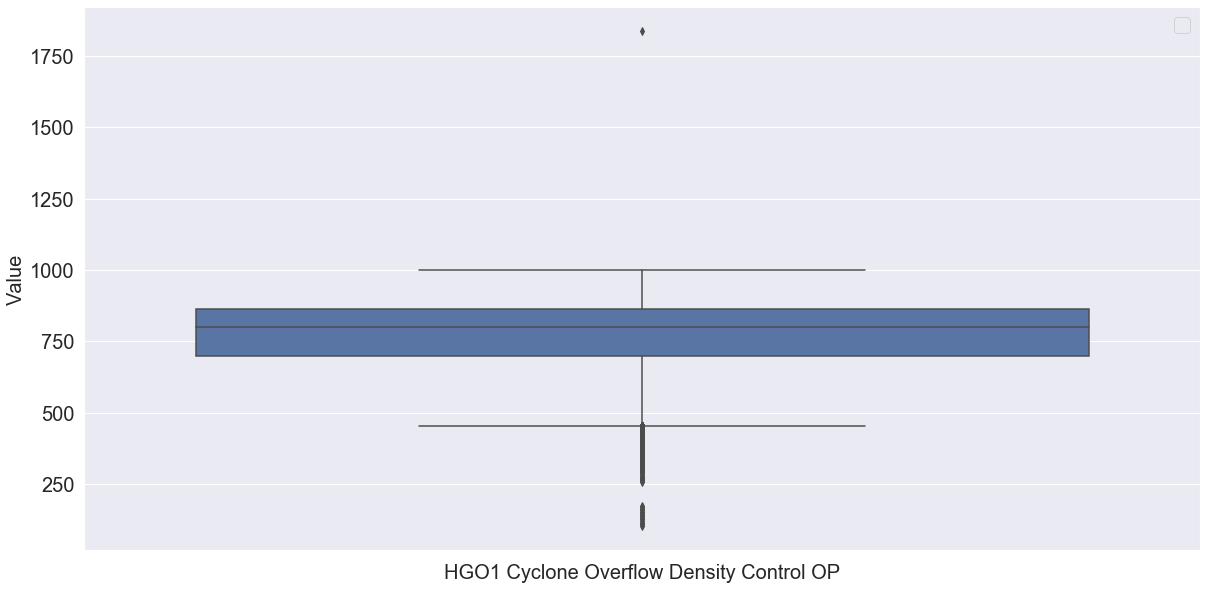

In [262]:
pp = PdfPages('HGO1 Cyclone Overflow Density Control OP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY001:DIC030C-OP'],data=df_p)
ax.set(xlabel='HGO1 Cyclone Overflow Density Control OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

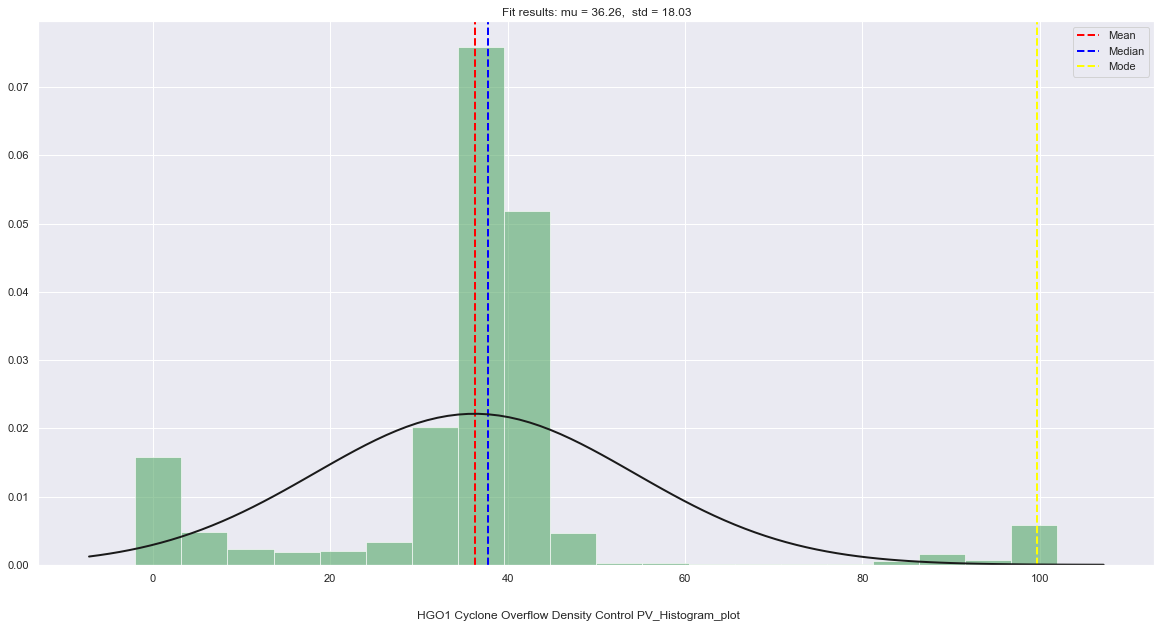

In [265]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY001:DIC030C-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO1 Cyclone Overflow Density Control PV_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO1 Cyclone Overflow Density Control PV_Histogram_plot"
plt.hist(df_p['PGR:CY001:DIC030C-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY001:DIC030C-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY001:DIC030C-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY001:DIC030C-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control PV')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [266]:
df_p['PGR:CY001:DIC030C-PV'].skew()

0.912513975057592

In [267]:
df_p['PGR:CY001:DIC030C-PV'].kurtosis()

4.370529322201129

In [268]:
df_p['PGR:CY001:DIC030C-PV'].std()

18.025099689231617

In [269]:
df_p['PGR:CY001:DIC030C-PV'].var()

324.9042188067377

In [270]:
df_p['PGR:CY001:DIC030C-PV'].isnull().sum()

5838

No handles with labels found to put in legend.


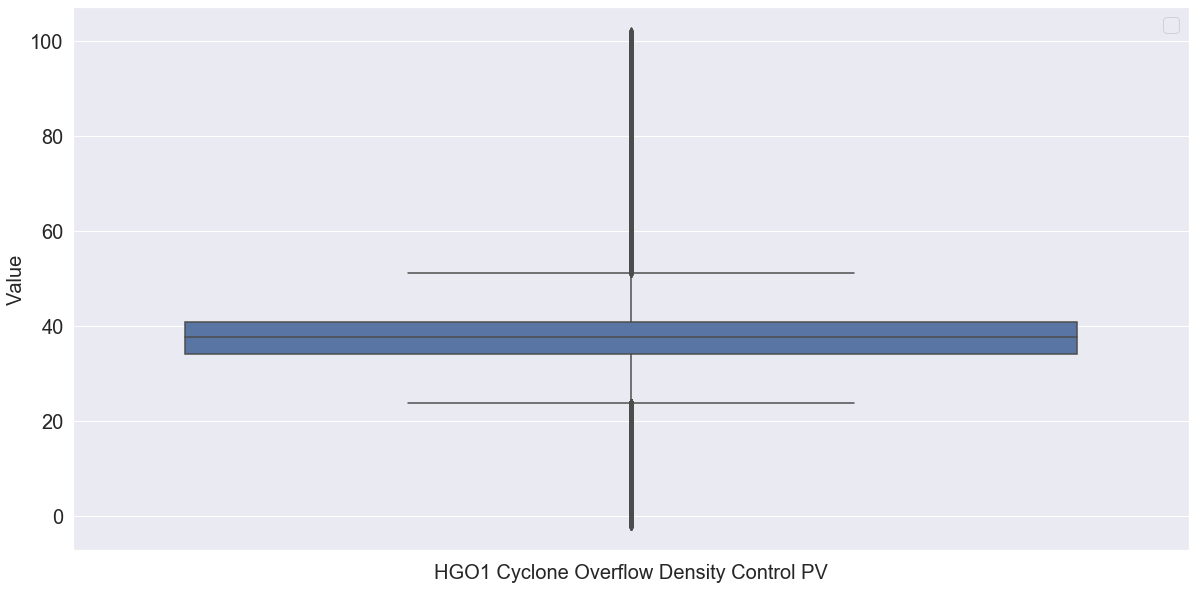

In [278]:
pp = PdfPages('HGO1 Cyclone Overflow Density Control PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY001:DIC030C-PV'],data=df_p)
ax.set(xlabel='HGO1 Cyclone Overflow Density Control PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

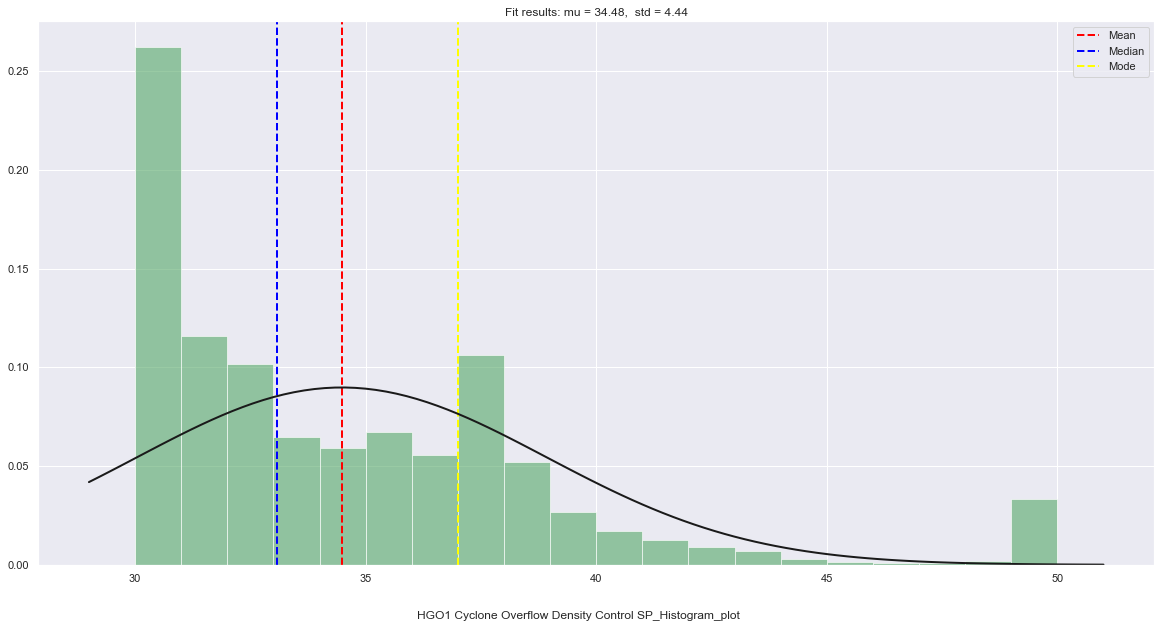

In [272]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY001:DIC030C-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO1 Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO1 Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_p['PGR:CY001:DIC030C-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY001:DIC030C-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY001:DIC030C-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY001:DIC030C-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control SP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [273]:
df_p['PGR:CY001:DIC030C-SP'].skew()

1.5314617025445931

In [274]:
df_p['PGR:CY001:DIC030C-SP'].kurtosis()

2.617062020202049

In [275]:
df_p['PGR:CY001:DIC030C-SP'].std()

4.439494411996049

In [276]:
df_p['PGR:CY001:DIC030C-SP'].var()

19.70911063414414

In [277]:
df_p['PGR:CY001:DIC030C-SP'].isnull().sum()

1817

No handles with labels found to put in legend.


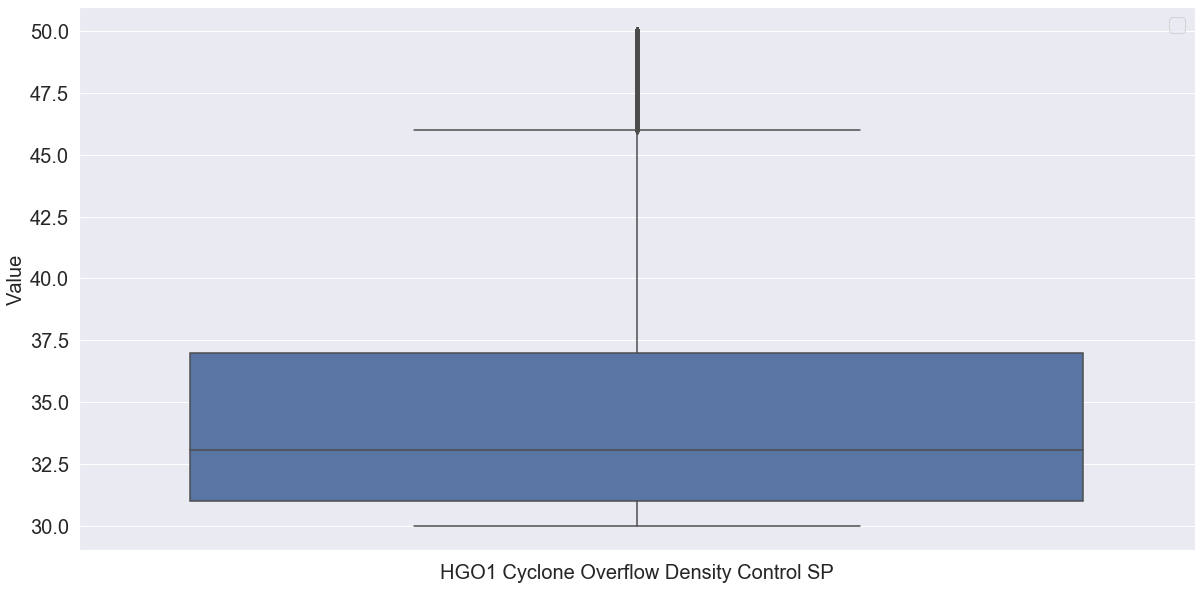

In [279]:
pp = PdfPages('HGO1 Cyclone Overflow Density Control SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY001:DIC030C-SP'],data=df_p)
ax.set(xlabel='HGO1 Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()